In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"A:\THENMOZHI\100data_set\dl_dataset_heart\heart.csv")


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(723)

In [6]:
df.shape

(1025, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df["target"].unique()

array([0, 1])

In [9]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [10]:
x=df.drop("target",axis=1)
y=df["target"]

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

scaler=StandardScaler()
x_train_resample=scaler.fit_transform(x_train)
x_test_resample=scaler.transform(x_test)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model=Sequential()
model.add(Dense(64,input_dim=x_train_resample.shape[1],activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [16]:
result=model.fit(x_train_resample,y_train,epochs=25,validation_split=0.2,batch_size=32)

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4799 - loss: 0.7121 - val_accuracy: 0.7378 - val_loss: 0.6133
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7223 - loss: 0.6158 - val_accuracy: 0.7988 - val_loss: 0.5109
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7775 - loss: 0.5270 - val_accuracy: 0.8049 - val_loss: 0.4164
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8339 - loss: 0.4108 - val_accuracy: 0.8293 - val_loss: 0.3641
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8253 - loss: 0.3845 - val_accuracy: 0.8232 - val_loss: 0.3380
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8544 - loss: 0.3645 - val_accuracy: 0.8415 - val_loss: 0.3074
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8708 - loss: 0.3033 - val_accuracy: 0.8659 - val_loss: 0.2906
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8716 - loss: 0.3164 - val_accuracy: 0.8659 - val_loss

In [17]:
loss, accuracy = model.evaluate(x_test_resample, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8818 - loss: 0.2314 
Test Accuracy: 90.73%


In [18]:
model.save("heart_disease_model.h5")

In [20]:
result_df=pd.DataFrame(result.history)

In [23]:
result_df

,accuracy,loss,val_accuracy,val_loss
0,0.515244,0.690861,0.737805,0.613257
1,0.737805,0.597099,0.798781,0.510908
2,0.801829,0.498756,0.804878,0.416366
3,0.820122,0.417287,0.829268,0.364060
4,0.842988,0.372894,0.823171,0.337992
5,0.859756,0.346798,0.841463,0.307410
6,0.865854,0.324986,0.865854,0.290553
7,0.881098,0.303176,0.865854,0.275445
8,0.887195,0.295073,0.884146,0.262510
9,0.897866,0.278857,0.865854,0.259022


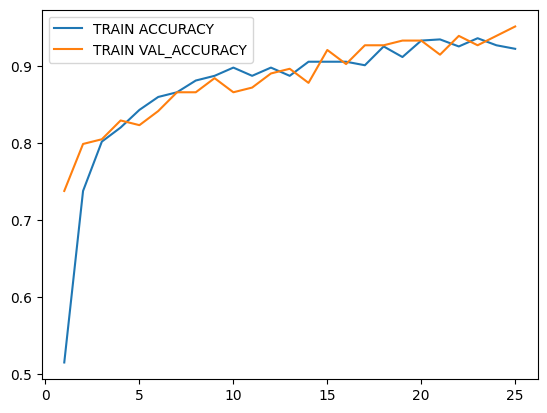

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(1,26),result_df["accuracy"],label="TRAIN ACCURACY")
plt.plot(range(1,26),result_df["val_accuracy"],label="TRAIN VAL_ACCURACY")
plt.legend()
plt.show()


In [24]:
import pickle

# Save your scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)